# Coursework B (SN: 21019919)

This notebook explores neural network training using the MNIST dataset. It focuses on building and training a neural network for image classification. A key aspect of the notebook is investigating the impact of varying noise levels on the model's accuracy, both during training and testing. This analysis helps to understand the model's robustness and generalisation capabilities under different conditions. The results are evaluated and visually represented to showcase the relationship between noise levels and performance.

## Importing relevant modules

In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import numpy as np



# Q1 Defining our random noise function

In [3]:
def add_noise_to_mnist(img, y_noise):
    """
    This function introduces random noise to a given MNIST image. The noise is uniformly distributed
    within a specified range and is added to the original image to create a noisy version.

    Parameters:
    img: The original MNIST image to which noise will be added.
         This should be a 2D numpy array representing the image.
    y_noise: The upper limit for the random noise values. This defines the range of noise as [0, y_noise).
             The noise values are uniformly distributed within this range.

    Returns:
    img_noisy: A new image which is a noisy version of the input image. The shape of the returned image is the same as the input image.
    """
    noise = np.random.uniform(0, y_noise, img.shape)
    img_noisy = img + noise
    return img_noisy



# Q2 Neural Network Training

In [4]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalise images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape for the Neural Network input
train_images = train_images.reshape((-1, 28, 28, 1))
test_images = test_images.reshape((-1, 28, 28, 1))

# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Model architecture
model = Sequential([Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1)), MaxPooling2D(pool_size=2), Flatten(), Dense(10, activation='softmax')])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)


# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2212 - accuracy: 0.9378 - val_loss: 0.1076 - val_accuracy: 0.9673
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0883 - accuracy: 0.9744 - val_loss: 0.0696 - val_accuracy: 0.9773
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0660 - accuracy: 0.9803 - val_loss: 0.0745 - val_accuracy: 0.9769
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0541 - accuracy: 0.9838 - val_loss: 0.0586 - val_accuracy: 0.9808
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.0621 - val_accuracy: 0.9806
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0393 - accuracy: 0.9882 - val_loss: 0.0653 - val_accuracy: 0.9815
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0610 - val_accuracy:

# Q3 Plotting of accuracy vs Y Noise

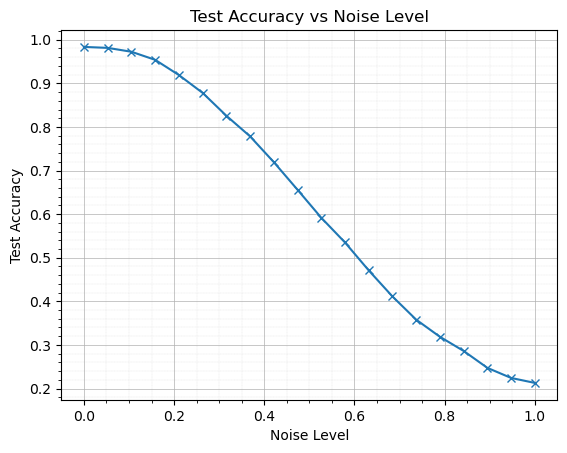

In [5]:
# Define the range of y_noise values that can be changed
y_noise_values = np.linspace(0, 1, 20)

# List to store test accuracies
accuracies = []


# Evaluating model for each y_noise
for y_noise in y_noise_values:

    # Add noise to the test images
    noisy_test_images = add_noise_to_mnist(test_images, y_noise)

    # Evaluating the model
    loss, accuracy = model.evaluate(noisy_test_images, test_labels, verbose=0)

    # Storing the test accuracies
    accuracies.append(accuracy)


# Plotting with my own custom grid settings
plt.plot(y_noise_values, accuracies, marker='x')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Noise Level')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()



# Q4 Retraining the neural netowrk

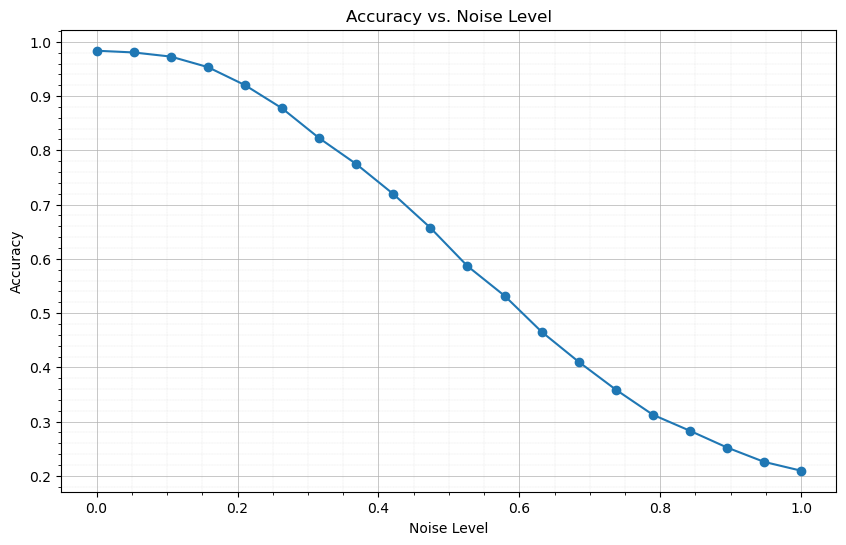

In [6]:
# Initialise a list to store the best test accuracies for each noise level
best_test_accuracies = []

# Define the range of y_noise values for training, can be adjusted
y_noise_train_values = np.linspace(0, 1, 20)

# For each y_noise value
for y_noise_train in y_noise_train_values:
    # Add noise to the training images
    train_images_noisy = add_noise_to_mnist(train_images, 0.3)



 # Train the model with noisy images
# Initialise a list to store test accuracies for this noise level
test_accuracies = []

# Evaluate the model for each y_noise value in the test set
for y_noise in y_noise_values:
    # Add noise to the test images
    test_images_noisy = add_noise_to_mnist(test_images, y_noise)

    # Evaluate the model
    test_loss, test_acc = model.evaluate(test_images_noisy,  test_labels, verbose=0)

    # Store the test accuracy
    test_accuracies.append(test_acc)

    # Store the best test accuracy for this noise level
    best_test_accuracies.append(max(test_accuracies))

# Plot best test accuracy vs y_noise_train
plt.figure(figsize=(10, 6))
plt.plot(y_noise_train_values, test_accuracies, marker='o')
plt.title('Accuracy vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Accuracy')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.2')
plt.show()

## Plotting Original Model with Noise = 0.3

In [7]:
# Initialising a list to store the best test accuracies for each noise level
best_test_accuracies = []

# Defining the range of y_noise values for training
y_noise_train_values = np.linspace(0, 1, 20)  # Adjust as needed

# For each y_noise value
for y_noise_train in y_noise_train_values:
    # Add noise to the training images
    train_images_noisy = add_noise_to_mnist(train_images, 0.3)


# Initialising a list to store test accuracies for this noise level
test_accuracies = []

# Evaluating the model for each y_noise value in the test set
for y_noise in y_noise_values:
    # Adding noise to the test images
    test_images_noisy = add_noise_to_mnist(test_images, y_noise)

    # Evaluating the model
    test_loss, test_acc = model.evaluate(test_images_noisy,  test_labels, verbose=0)

    # Storing the test accuracy
    test_accuracies.append(test_acc)

    # Storing the best test accuracy for this noise level
    best_test_accuracies.append(max(test_accuracies))

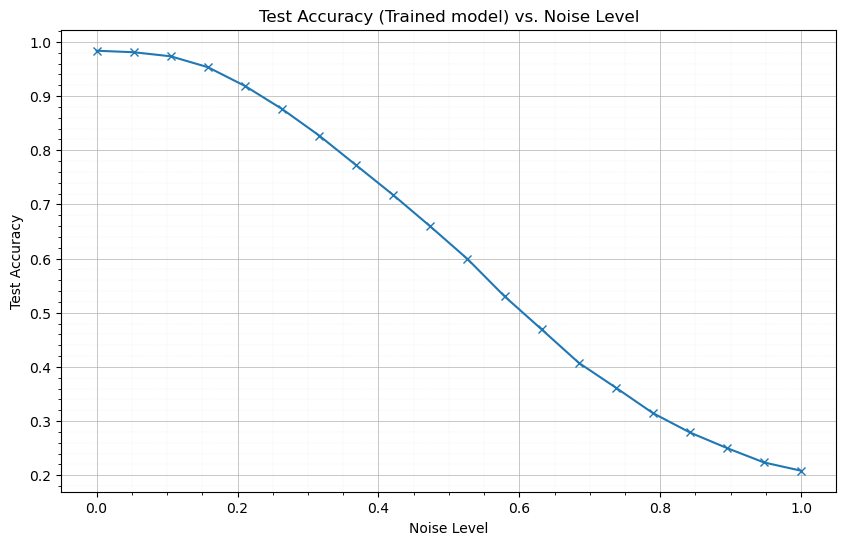

In [8]:
# Plotting best test accuracy vs Noise level but its trained
plt.figure(figsize=(10, 6))
plt.plot(y_noise_train_values, test_accuracies, marker='x')
plt.title('Test Accuracy (Trained model) vs. Noise Level')
plt.xlabel('Noise Level')
plt.ylabel('Test Accuracy')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()

## Plotting Retrained Model using Noise from 0 to 1

Epoch 1/3
600/600 [==============================] - 1s 797us/step - loss: 0.4026 - accuracy: 0.8801
Epoch 2/3
600/600 [==============================] - 0s 749us/step - loss: 0.2004 - accuracy: 0.9404
Epoch 3/3
600/600 [==============================] - 0s 746us/step - loss: 0.1492 - accuracy: 0.9565


Epoch 1/3
600/600 [==============================] - 1s 811us/step - loss: 0.4149 - accuracy: 0.8787
Epoch 2/3
600/600 [==============================] - 0s 801us/step - loss: 0.2037 - accuracy: 0.9400
Epoch 3/3
600/600 [==============================] - 0s 798us/step - loss: 0.1507 - accuracy: 0.9561


Epoch 1/3
600/600 [==============================] - 1s 776us/step - loss: 0.4225 - accuracy: 0.8732
Epoch 2/3
600/600 [==============================] - 0s 764us/step - loss: 0.2034 - accuracy: 0.9395
Epoch 3/3
600/600 [==============================] - 0s 768us/step - loss: 0.1500 - accuracy: 0.9564


Epoch 1/3
600/600 [==============================] - 1s 782us/step - loss: 0.4510 - accuracy: 0.8666
Epoch 2/3
600/600 [==============================] - 0s 749us/step - loss: 0.2082 - accuracy: 0.9376
Epoch 3/3
600/600 [==============================] - 0s 736us/step - loss: 0.1538 - accuracy: 0.9541


Epoch 1/3
600/600 [==============================] - 1s 935us/step - loss: 0.4689 - accuracy: 0.8565
Epoch 2/3
600/600 [==============================] - 0s 812us/step - loss: 0.2085 - accuracy: 0.9376
Epoch 3/3
600/600 [==============================] - 0s 805us/step - loss: 0.1519 - accuracy: 0.9545


Epoch 1/3
600/600 [==============================] - 1s 810us/step - loss: 0.5440 - accuracy: 0.8345
Epoch 2/3
600/600 [==============================] - 0s 785us/step - loss: 0.2404 - accuracy: 0.9283
Epoch 3/3
600/600 [==============================] - 0s 796us/step - loss: 0.1817 - accuracy: 0.9454


Epoch 1/3
600/600 [==============================] - 1s 752us/step - loss: 0.5467 - accuracy: 0.8278
Epoch 2/3
600/600 [==============================] - 0s 733us/step - loss: 0.2343 - accuracy: 0.9285
Epoch 3/3
600/600 [==============================] - 0s 768us/step - loss: 0.1772 - accuracy: 0.9462


Epoch 1/3
600/600 [==============================] - 1s 822us/step - loss: 0.6131 - accuracy: 0.8046
Epoch 2/3
600/600 [==============================] - 0s 755us/step - loss: 0.2494 - accuracy: 0.9250
Epoch 3/3
600/600 [==============================] - 0s 760us/step - loss: 0.1868 - accuracy: 0.9440


Epoch 1/3
600/600 [==============================] - 1s 795us/step - loss: 0.6818 - accuracy: 0.7786
Epoch 2/3
600/600 [==============================] - 0s 773us/step - loss: 0.2783 - accuracy: 0.9147
Epoch 3/3
600/600 [==============================] - 0s 749us/step - loss: 0.2078 - accuracy: 0.9359


Epoch 1/3
600/600 [==============================] - 1s 791us/step - loss: 0.8514 - accuracy: 0.7160
Epoch 2/3
600/600 [==============================] - 0s 780us/step - loss: 0.3445 - accuracy: 0.8924
Epoch 3/3
600/600 [==============================] - 0s 774us/step - loss: 0.2631 - accuracy: 0.9187


Epoch 1/3
600/600 [==============================] - 1s 821us/step - loss: 1.0661 - accuracy: 0.6439
Epoch 2/3
600/600 [==============================] - 1s 892us/step - loss: 0.3884 - accuracy: 0.8778
Epoch 3/3
600/600 [==============================] - 0s 795us/step - loss: 0.2901 - accuracy: 0.9102


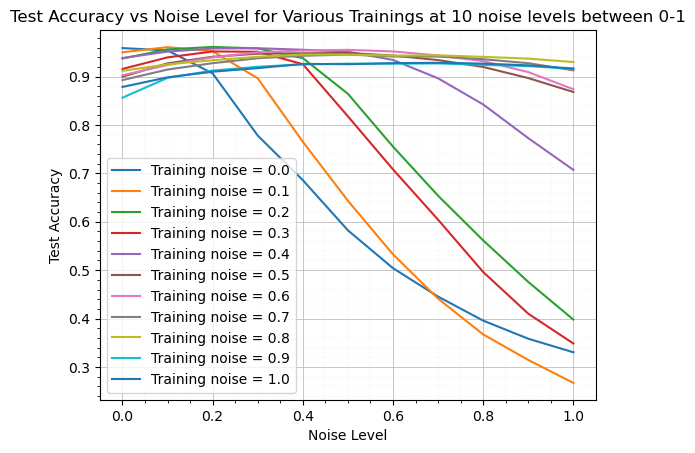

In [9]:
train_noise = np.linspace(0, 1, 11)
y_noises = np.linspace(0, 1, 11)
accuracies3 = np.zeros([len(y_noises), len(train_noise)])

for i in range(len(train_noise)):

    # Replace 'train_images' with the variable name used for training images in c2
    noisey_training_images2 = add_noise_to_mnist(train_images, train_noise[i])

    # Define your model - ensure this matches with the model structure in c2
    model3 = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='sigmoid'),
        keras.layers.Dense(10)  # Adjust the number of neurons if different in c2
    ])

    # Compile the model
    model3.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
                   optimizer=tf.keras.optimizers.SGD(learning_rate=1.0),
                   metrics=['accuracy'])

    # Fit the model - replace 'train_labels' if different in c2
    model3.fit(noisey_training_images2, train_labels, batch_size=100, epochs=3)

    for j in range(len(y_noises)):
        # Replace 'test_images' and 'test_labels' if different in c2
        noisey_test2 = add_noise_to_mnist(test_images, y_noises[j])
        loss3, accuracy3 = model3.evaluate(noisey_test2, test_labels, verbose=0)
        accuracies3[i, j] = accuracy3

    plt.plot(y_noises, accuracies3[i, :], label=f'Training noise = {round(train_noise[i], 1)}')
    plt.xlabel('Noise Level')
    plt.ylabel('Test Accuracy')
    plt.legend()


plt.title('Test Accuracy vs Noise Level for Various Trainings at 10 noise levels between 0-1')
plt.grid(True, which='both', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(which='minor', linestyle=':', linewidth='0.1')
plt.show()


# Q5 Conclusion:

To determine the optimal level of noise to add to the training dataset for maximising performance, we conducted a series of experiments where the model was retrained with different levels of noise. We used a linearly spaced range of noise levels, from 0 to 1, incremented in steps of 0.1. For each level of noise added to the training dataset, the model was retrained from scratch.

We then evaluated each of these models on the test dataset, which was modified with the same range of noise levels. This approach allowed us to assess the model's performance across a spectrum of noise conditions, both in training and testing.

The performance metric used to evaluate the model was test accuracy. The choice of this metric was guided by the model's application in image classification, where accuracy is a straightforward and relevant measure of success.

When the model was trained with low noise the model's accuracy fell at a quicker rate compared with if the model was trained with a higher noise level. This can be seen in the last graph "Test Accuracy vs Various Trainings at 10 noise levels between 0-1"

In conclusion, adding a controlled amount of noise to the training data can be beneficial for improving model robustness against noisy inputs. The optimal level of noise will depend on the specific characteristics of both the model and the dataset.